##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


# Uczenie głębokie

Jacek Rumiński, Politechnika Gdańska, Wydział ETI, Katedra Inżynierii Biomedycznej

**Wykład 2:** Sieci splotowe

**Przykład (1):** Operacja splotu - przykładowe znaczenie operacji splotu dla danych 2D


W ramach tego notatnika zapoznamy się z przykładami efektu operacji splotu stosując różne maski splotu dla danego obrazu.


Wskażmy pakiety, z jakich będziemy korzystać:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import cv2
import seaborn as sns; sns.set_theme()
from matplotlib.colors import ListedColormap


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}


print(tf.__version__)

2.6.0


Rozpocznijmy od definicji prostych masek splotu o rozmarze 3x3, które poprzez wykonanie operacji splotu na obrazie wejściowym doprowadzą do:
- rozmycia obrazu (filtr dolnoprzepustowy),
- wykrycia róznic w obrazie (filtr górnoprzepustowy),
- wykrycia poziomych krawędzi w obrazie (filtr krawędziowy, górnoprzepustowy),
- wykrycia pionowych krawędzi w obrazie (filtr krawędziowy, górnoprzepustowy).

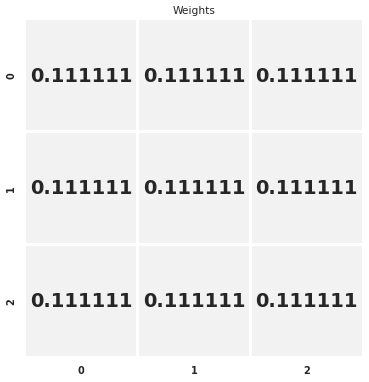

In [ ]:
kernel_01 = np.ones((3,3),np.float32)
kernel_01 = kernel_01/np.sum(kernel_01)

fig = plt.figure(figsize=(11, 7), dpi=64)
# plt.style.use('fivethirtyeight')
matplotlib.rc('font', **font)

ax1 = sns.heatmap(kernel_01,
                  cbar=False,
                  square=True,
                  annot=True,
                  fmt='g',
                  cmap=ListedColormap(['#F2F2F2']),
                  linewidths=2.)

ax1.set(title="Weights")
plt.show()


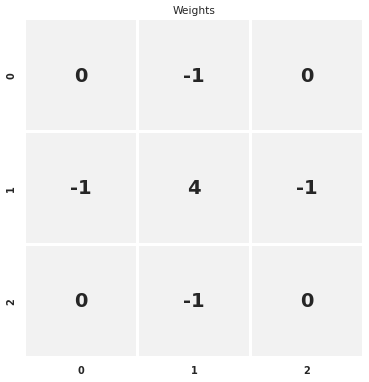

In [ ]:
kernel_02 = np.array([[0.,-1.,0.],[-1.,4.,-1.],[0.,-1.,0.]],np.float32)

fig = plt.figure(figsize=(11, 7), dpi=64)

ax1 = sns.heatmap(kernel_02,
                  cbar=False,
                  square=True,
                  annot=True,
                  fmt='g',
                  cmap=ListedColormap(['#F2F2F2']),
                  linewidths=2.)
ax1.set(title="Weights")
plt.show()

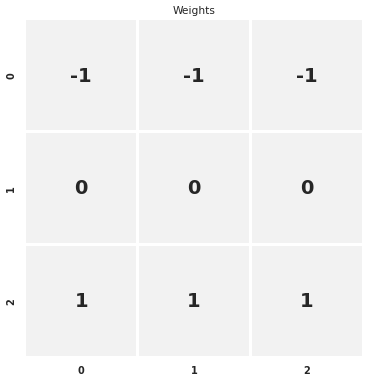

In [ ]:
kernel_03 = np.array([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]],np.float32)

fig = plt.figure(figsize=(10, 7), dpi=64)


ax1 = sns.heatmap(kernel_03,
                  cbar=False,
                  square=True,
                  annot=True,
                  fmt='g',
                  cmap=ListedColormap(['#F2F2F2']),
                  linewidths=2.)
ax1.set(title="Weights")
plt.show()

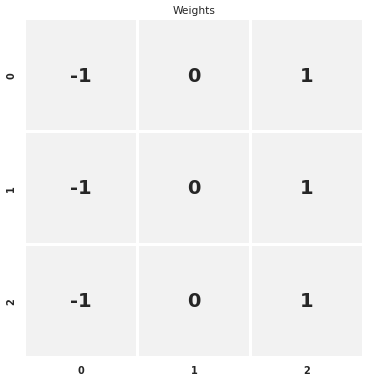

In [ ]:
kernel_04 = np.array([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]],np.float32)

fig = plt.figure(figsize=(10, 7), dpi=64)

ax1 = sns.heatmap(kernel_04,
                  cbar=False,
                  square=True,
                  annot=True,
                  fmt='g',
                  cmap=ListedColormap(['#F2F2F2']),
                  linewidths=2.)
ax1.set(title="Weights")
plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50108  100 50108    0     0   843k      0 --:--:-- --:--:-- --:--:--  858k


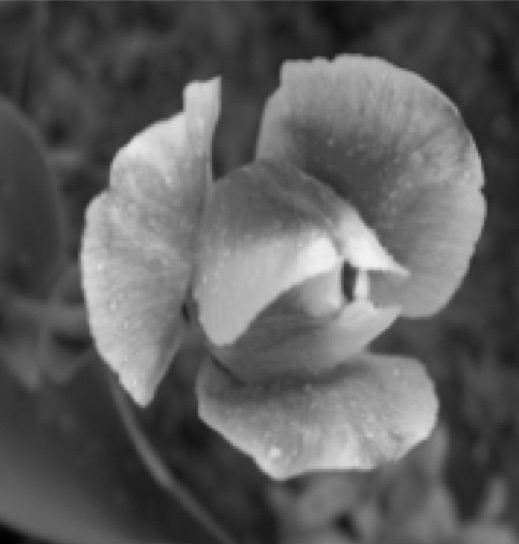

In [ ]:
!curl -o flower_1.jpg "https://raw.githubusercontent.com/dartfather/ml/main/flower_1.jpg"
# !ls -la

from google.colab.patches import cv2_imshow

img = cv2.imread('flower_1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

(544, 519, 3)
(544, 519, 3)


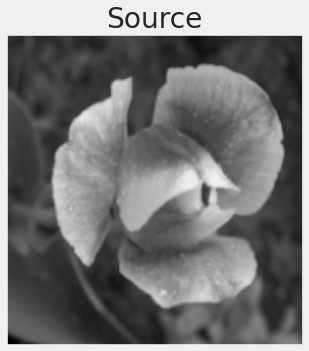

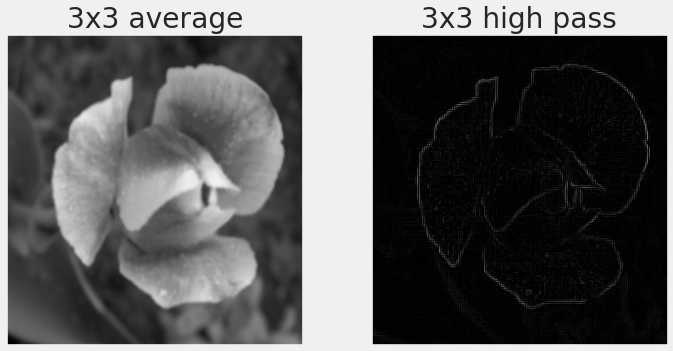

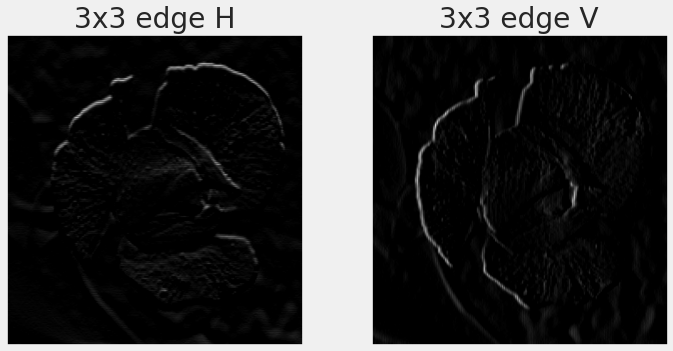

In [ ]:
# Apply convolution with each kernel
# -1 -> default depth,
# Default BorderType - cv.BORDER_DEFAULT - BORDER_REFLECT_101:
# Padding using reflection of an image as:  gfedcb|abcdefgh|gfedcba (| - image border)
# https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5
# cv.BORDER_ISOLATED - do not introduce padding

dst_01 = cv2.filter2D(img,-1,kernel_01)
# print(img.shape)
# print(dst_01.shape)
dst_02 = cv2.filter2D(img,-1,kernel_02)

# rescale values for better voisualization effect
# dst_02 = cv2.normalize(dst_02, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
dst_02 = cv2.normalize(dst_02, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX)

dst_03 = cv2.filter2D(img,-1,kernel_03)
dst_04 = cv2.filter2D(img,-1,kernel_04)

# Show results

fig = plt.figure(figsize=(6, 6), dpi=64)
plt.subplot(111),plt.imshow(img),plt.title('Source')
plt.xticks([]), plt.yticks([])
plt.show()

fig1 = plt.figure(figsize=(12, 6), dpi=64)
plt.subplot(121),plt.imshow(dst_01),plt.title('3x3 average')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_02),plt.title('3x3 high pass')
plt.xticks([]), plt.yticks([])
plt.show()

fig2 = plt.figure(figsize=(12, 6), dpi=64)
plt.subplot(121),plt.imshow(dst_03),plt.title('3x3 edge H')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_04),plt.title('3x3 edge V')
plt.xticks([]), plt.yticks([])
plt.show()

W efekcie uzyskaliśmy 4 maski splotu oraz 4 nowe macierze danych zawierających efekt filtracji - nową reprezentację danych wejściowych.

Tradycyjnie konstruowane cechy (deskryptory) reprezentujące obrazy generowały pojedyczne wartości (lub zbiory wartości) jako agregacja efektu filtracji. Przykładowo: suma wartości obrazu po filtracji górnoprzepustowej z filtrem X, "energia" (suma kwadratów znormalizowanej częstości występowania poszczególnych wartości) dla obrazu po filtracji krawędziowej z filtrem Y, itp.

Przykładowo stosują 12 różnych filtrów oraz dwa deskrytpory dla każdego z efektór filtracji uzyskamy 24 nowe wartości - wektor 1D - reprezentujący pewne własności obrazu wejściowego.

W sieciach splotowych wykorzystywać będziemy dokładnie takie działanie. Określimy liczbę i rozmiar filtrów (masek), których współczynniki (wagi) będą dobierane w procesie uczenia. Procedura filtracji może się powtarzać sekwencyjnie. Na końcu dne zostaną "spłaszczone" tworząc wektor 1D - reprezentujący pewne własności obrazu wejściowego. Wektor ten będzie podawany na wejście np. klasyfikatora MLP lub wejście innego algorytmu (nie koniecznie bazującego na siecich neuronowych).



Na koniec zobaczmy przykład wykonania wielokrotnie tej samej operacji na danych źródłowych z zastosowaniem dopełnienia danych (padding) stałą wartością (0) dla OpenCv.

(544, 519, 3)
(544, 519, 3)


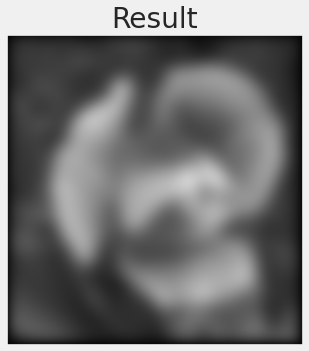

In [ ]:
# Define filter mask with hogher size
# (to show the effect of the 0 padding at edges)

kernel_10 = np.ones((15,15),np.float32)
kernel_10 = kernel_10/np.sum(kernel_10)

dst = cv2.filter2D(img,-1,kernel_10, borderType = cv2.BORDER_CONSTANT)
for i in range(0, 10):
  dst = cv2.filter2D(dst,-1,kernel_10, borderType = cv2.BORDER_CONSTANT)

print(img.shape)
print(dst.shape)

fig = plt.figure(figsize=(6, 6), dpi=64)
plt.subplot(111),plt.imshow(dst),plt.title('Result')
plt.xticks([]), plt.yticks([])
plt.show()

Zachęcam Państwa do dalszego eksperymentowania.

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>